Импортируем библиотеки

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

import pandas as pd
from imblearn.under_sampling import NearMiss
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import PolynomialFeatures

Читаем данные

In [ ]:
df = pd.read_csv('smoking_train.csv')
test = pd.read_csv('smoking_test.csv')

In [ ]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,yes
1,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,no
2,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,no
3,5,M,30.0,180,75.0,85.0,1.2,1.2,1.0,1.0,...,16.2,1.0,1.2,18.0,27.0,33.0,Y,0,Y,no
4,6,M,40.0,160,60.0,85.5,1.0,1.0,1.0,1.0,...,17.0,1.0,0.7,21.0,27.0,39.0,Y,1,Y,yes


In [ ]:
df.drop(columns = ['age','height(cm)','weight(kg)','waist(cm)','eyesight(left)','eyesight(right)']).describe()

,ID,hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
count,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000,44554.000000
mean,27873.284666,1.026148,1.026395,121.485770,76.034520,99.317615,196.869327,126.723235,57.299210,114.937649,14.624036,1.086996,0.886179,26.191251,27.108385,40.017417,0.213180
std,16068.515110,0.159577,0.160309,13.668845,9.666047,20.821522,36.280831,71.619939,14.819603,41.241943,1.562096,0.403306,0.221365,19.243979,32.568240,50.624265,0.409558
min,2.000000,1.000000,1.000000,71.000000,40.000000,46.000000,55.000000,11.000000,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,2.000000,0.000000
25%,13951.750000,1.000000,1.000000,112.000000,70.000000,89.000000,172.000000,74.000000,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000
50%,27888.500000,1.000000,1.000000,120.000000,76.000000,96.000000,195.000000,108.000000,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000
75%,41770.750000,1.000000,1.000000,130.000000,82.000000,104.000000,220.000000,160.000000,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000
max,55691.000000,2.000000,2.000000,233.000000,146.000000,505.000000,442.000000,999.000000,618.000000,1810.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44554 entries, 0 to 44553
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   44554 non-null  int64  
 1   gender               44554 non-null  object 
 2   age                  44114 non-null  float64
 3   height(cm)           44554 non-null  int64  
 4   weight(kg)           44510 non-null  float64
 5   waist(cm)            44554 non-null  float64
 6   eyesight(left)       44554 non-null  float64
 7   eyesight(right)      44554 non-null  float64
 8   hearing(left)        44554 non-null  float64
 9   hearing(right)       44554 non-null  float64
 10  systolic             44554 non-null  float64
 11  relaxation           44554 non-null  float64
 12  fasting blood sugar  44554 non-null  float64
 13  Cholesterol          44554 non-null  float64
 14  triglyceride         44554 non-null  float64
 15  HDL                  44554 non-null 

Заменим нечисловые значения

In [ ]:
df['gender'].value_counts()

M    28372
F    16182
Name: gender, dtype: int64

In [ ]:
df['gender'] = df['gender'].map({'M': 0, 'F': 1})
test['gender'] = test['gender'].map({'M': 0, 'F': 1})

In [ ]:
df['oral'].value_counts()

Y    44554
Name: oral, dtype: int64

In [ ]:
df = df.drop(columns = 'oral')
test = test.drop(columns = 'oral')

In [ ]:
df['tartar'].value_counts()

Y    24785
N    19769
Name: tartar, dtype: int64

In [ ]:
df['tartar'] = df['tartar'].map({'N': 0, 'Y': 1})
test['tartar'] = test['tartar'].map({'N': 0, 'Y': 1})

In [ ]:
df['smoking'].value_counts()

no     28170
yes    16384
Name: smoking, dtype: int64

In [ ]:
df['smoking'] = df['smoking'].map({'no': 0, 'yes': 1})

In [ ]:
# df_m = df[df['smoking'] == 0]
# df_f = df[df['smoking'] == 1]
# count_to_remove = abs(len(df_m) - len(df_f)) 
# df_m = df_m.sample(n=len(df_m)-count_to_remove, random_state=42)
# df_balanced = pd.concat([df_m, df_f])

In [ ]:
id = test['ID']
df = df.drop(columns = 'ID')
test = test.drop(columns = 'ID')


Посмотрим пропуски

In [ ]:
df.isna().sum()

gender                   0
age                    440
height(cm)               0
weight(kg)              44
waist(cm)                0
eyesight(left)           0
eyesight(right)          0
hearing(left)            0
hearing(right)           0
systolic                 0
relaxation               0
fasting blood sugar      0
Cholesterol              0
triglyceride             0
HDL                      0
LDL                      0
hemoglobin               0
Urine protein            0
serum creatinine         0
AST                      0
ALT                      0
Gtp                      0
dental caries            0
tartar                   0
smoking                  0
dtype: int64

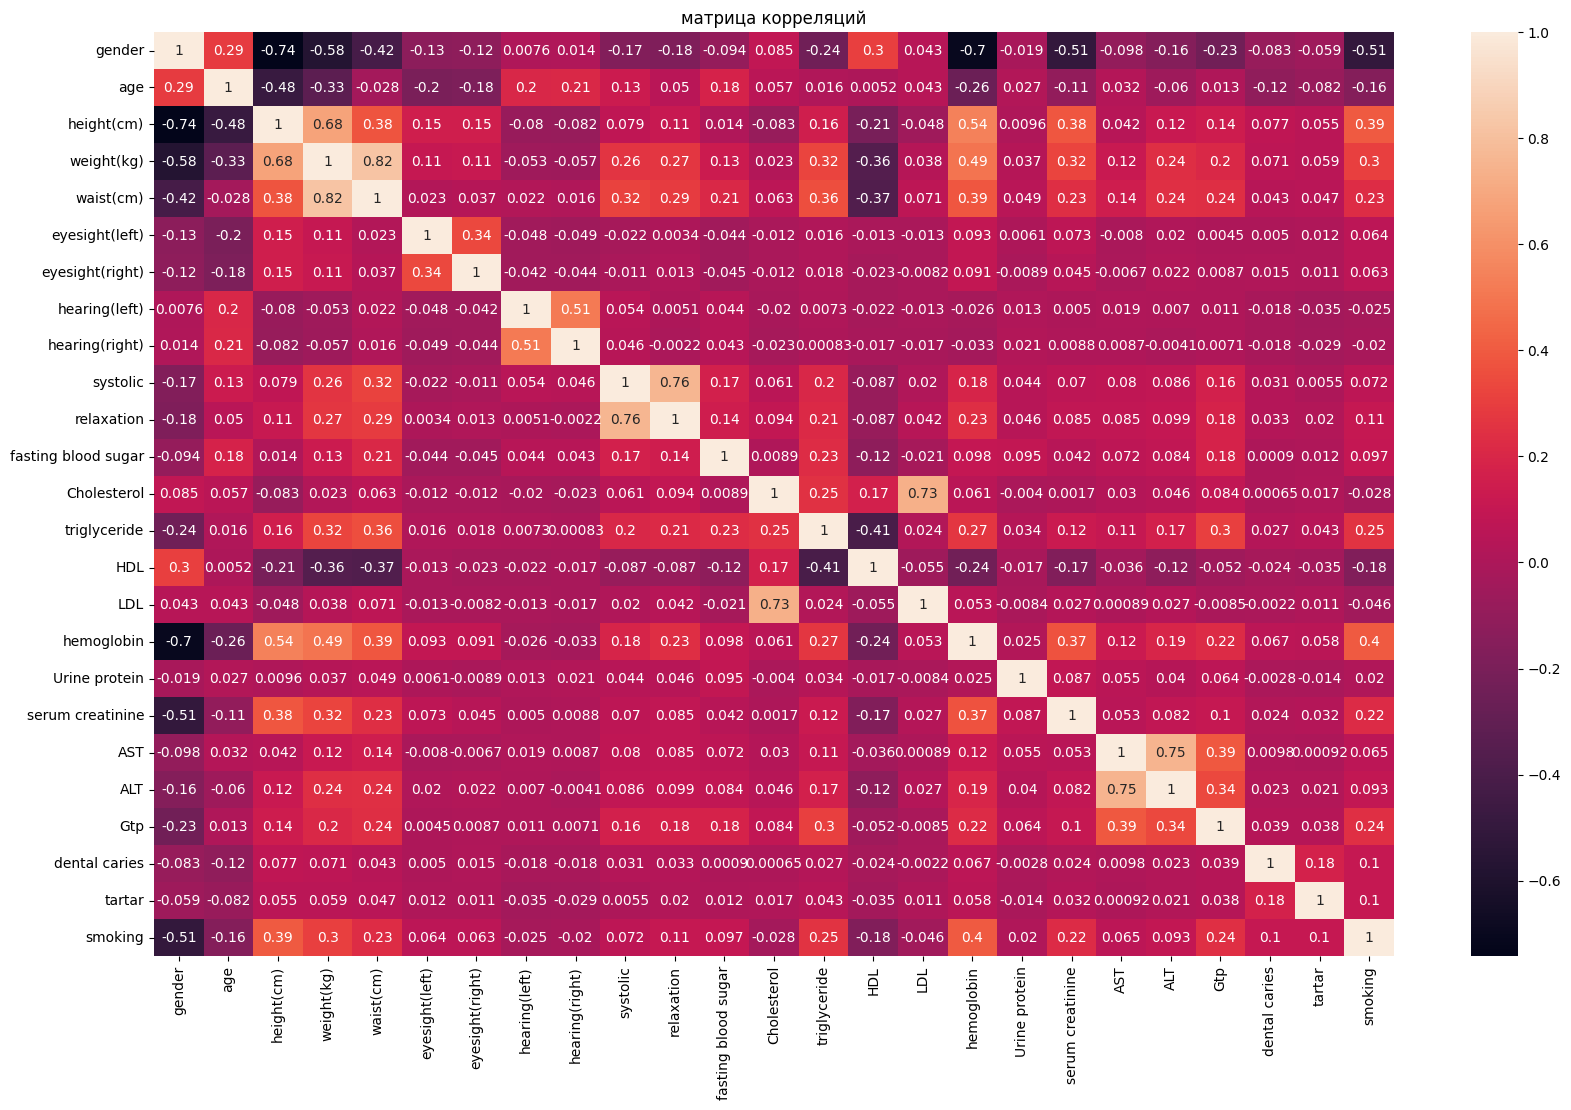

In [ ]:
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(df.corr(), annot=True)
plt.title("матрица корреляций");

In [ ]:
df['smoking'].value_counts()

0    28170
1    16384
Name: smoking, dtype: int64

Уберем NaN и нормализуем данные

In [ ]:
df['age'].isna().sum() / len(df['age']), df['weight(kg)'].isna().sum() / len(df['weight(kg)'])

(0.009875656506710958, 0.0009875656506710957)

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(columns = 'smoking')
y = df['smoking']

In [ ]:
test = (test - np.min(test)) / (np.max(test) - np.min(test)).values

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
X = (X - np.min(X)) / (np.max(X) - np.min(X)).values

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [ ]:
# from imblearn.under_sampling import TomekLinks

# # Создание объекта TomekLinks
# tomek_links = TomekLinks()

# # Применение Tomek links для сбалансированного недообучения
# X, y = tomek_links.fit_resample(X, y)

In [ ]:
y.value_counts()

0    27848
1    16223
Name: smoking, dtype: int64

PowerTransformer

In [ ]:
scaler = PowerTransformer()
X[X.columns] = scaler.fit_transform(X)
test[test.columns] = scaler.fit_transform(test)

Генерация признаков

In [ ]:
X_exc = X.drop(columns = ['gender', 'tartar', 'hearing(left)', 'hearing(right)','dental caries'])
poly = PolynomialFeatures(2, include_bias=False)
X_poly = poly.fit_transform(X_exc)
new_columns = []
for i in range(X_poly.shape[1]):
    if i == 0:
        new_columns.append('1')
    elif i <= X_exc.shape[1]:
        new_columns.append(f'x{i}')
    else:
        new_columns.append(f'x{i}_poly')
X_poly_df = pd.DataFrame(X_poly, columns=new_columns)
X = X.reset_index(drop = True)
X = pd.concat([X, X_poly_df], axis=1)

In [ ]:
X.columns

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic',
       ...
       'x199_poly', 'x200_poly', 'x201_poly', 'x202_poly', 'x203_poly',
       'x204_poly', 'x205_poly', 'x206_poly', 'x207_poly', 'x208_poly'],
      dtype='object', length=233)

In [ ]:
# nearmiss1 = NearMiss(version=1)
# X_resampled1, y_resampled1 = nearmiss1.fit_resample(X, y)

In [ ]:
# import optuna
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import classification_report, f1_score

# def objective(trial):
#     C = trial.suggest_loguniform('C', 0.001, 100)
#     penalty = trial.suggest_categorical('penalty', ['l2'])
#     max_iter = trial.suggest_int('max_iter', 100, 1000)

#     model = LogisticRegression(C=C, penalty=penalty, max_iter=max_iter)

#     model.fit(X_train, y_train)

#     y_pred = model.predict(X_test)

#     f1 = f1_score(y_test, y_pred)

#     # Возвращение значения для оптимизации
    

#     return f1

# study = optuna.create_study(direction='maximize')
# study.optimize(objective, n_trials=100)

In [ ]:
# best_f1 = study.best_value
# best_f1,study.best_params['C'], study.best_params['penalty'],study.best_params['max_iter']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

nearmiss1 = NearMiss(version=1)
X_train_resampled1, y_train_resampled1 = nearmiss1.fit_resample(X_train, y_train)

nearmiss2 = NearMiss(version=2)
X_train_resampled2, y_train_resampled2 = nearmiss2.fit_resample(X_train, y_train)

model1 = LogisticRegression()
model1.fit(X_train_resampled1, y_train_resampled1)

model2 = LogisticRegression()
model2.fit(X_train_resampled2, y_train_resampled2)

y_pred1 = model1.predict(X_test)
y_pred2 = model2.predict(X_test)

print("NearMiss1:")
print(classification_report(y_test, y_pred1))

print("NearMiss2:")
print(classification_report(y_test, y_pred2))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NearMiss1:
              precision    recall  f1-score   support

           0       0.84      0.66      0.74      9205
           1       0.57      0.78      0.66      5339

    accuracy                           0.70     14544
   macro avg       0.70      0.72      0.70     14544
weighted avg       0.74      0.70      0.71     14544

NearMiss2:
              precision    recall  f1-score   support

           0       0.86      0.67      0.75      9205
           1       0.59      0.82      0.68      5339

    accuracy                           0.72     14544
   macro avg       0.73      0.74      0.72     14544
weighted avg       0.76      0.72      0.73     14544



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# from imblearn.under_sampling import TomekLinks

# # Создание объекта TomekLinks
# tomek_links = TomekLinks()

# # Применение Tomek links для сбалансированного недообучения
# X_train_res, y_train_res = tomek_links.fit_resample(X_train, y_train)

In [ ]:
clf = LogisticRegression(C = 1.1834882664841169, penalty = 'l2', max_iter = 675)
clf.fit(X_train,y_train)

LogisticRegression(C=1.1834882664841169, max_iter=675)

In [ ]:
from sklearn.metrics import f1_score
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.81      9205
           1       0.66      0.70      0.68      5339

    accuracy                           0.76     14544
   macro avg       0.74      0.74      0.74     14544
weighted avg       0.76      0.76      0.76     14544



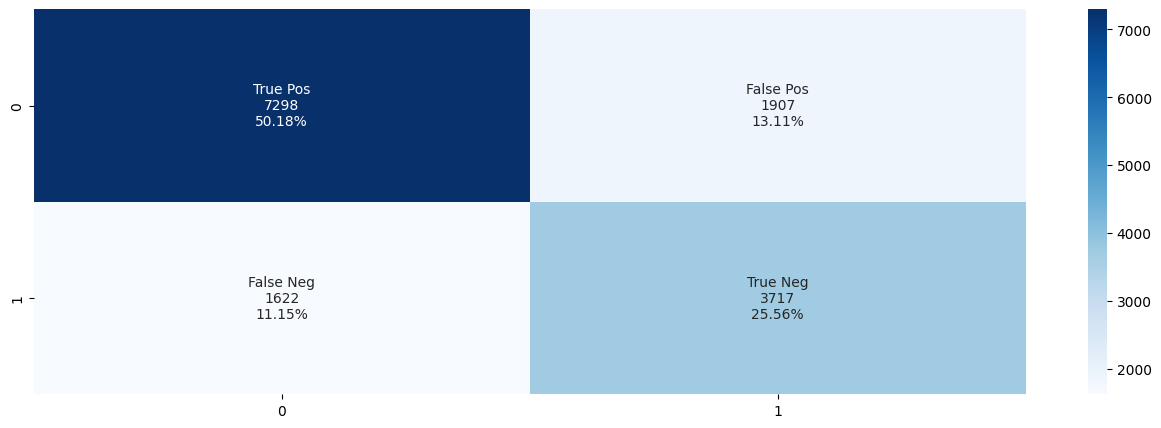

In [ ]:
from sklearn.metrics import confusion_matrix

group_names = ['True Pos', 'False Pos', 'False Neg', 'True Neg']
test_cnf_matrix = confusion_matrix(y_test,y_pred)
test_counts = ["{0:0.0f}".format(value) for value in test_cnf_matrix.flatten()]
test_percentage = ["{0:.2%}".format(value) for value in test_cnf_matrix .flatten()/np.sum(test_cnf_matrix)]
test_labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,test_counts,test_percentage)]
test_labels = np.asarray(test_labels).reshape(2,2)
plt.figure(figsize = (16,5))
sns.heatmap(test_cnf_matrix, annot=test_labels, fmt='', cmap='Blues');

Submit

In [ ]:
clf = LogisticRegression(C = 1.1834882664841169, penalty = 'l2', max_iter = 675)
clf.fit(X,y)

LogisticRegression(C=1.1834882664841169, max_iter=675)

In [ ]:
test = test.fillna(test.mean())

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

test_exc = test.drop(columns = ['gender', 'tartar', 'hearing(left)', 'hearing(right)','dental caries'])
poly = PolynomialFeatures(2, include_bias=False)
test_poly = poly.fit_transform(test_exc)
new_columns = []
for i in range(test_poly.shape[1]):
    if i == 0:
        new_columns.append('1')
    elif i <= test_exc.shape[1]:
        new_columns.append(f'x{i}')
    else:
        new_columns.append(f'x{i}_poly')
test_poly_df = pd.DataFrame(test_poly, columns=new_columns)
test = test.reset_index(drop = True)
test = pd.concat([test, test_poly_df], axis=1)

In [ ]:
y_pred = clf.predict(test)

In [ ]:
submission = pd.DataFrame({'ID': id, 'smoking' : y_pred})
submission = submission.set_index('ID')

In [ ]:
submission['smoking'] = submission['smoking'].replace(1,'yes').replace(0,'no')

In [ ]:
submission.to_csv('sub.csv')

In [ ]:
submission

,smoking
ID,
48715,no
49650,yes
18013,no
24282,no
9215,yes
...,...
20787,no
5000,no
36617,no
